In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
env = gym.make('MountainCar-v0')

# About the Environment

In [2]:
observation = env.reset()
print(observation)

(array([-0.47798708,  0.        ], dtype=float32), {})


Here we can see that the states for selected environment is an box of length two, that is the horizontal distance from the centre and velocity at that point.
Here we can see that the action space for the selected environment is an discrete value of three possibilities, that are to accelerate left, right and rest.

In [3]:
print("State Space ", env.observation_space)
print(type(env.observation_space))
print(env.observation_space.low)
print(env.observation_space.high)
print("Action Space", env.action_space)
print(type(env.action_space))
print(env.action_space.sample())

State Space  Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
<class 'gym.spaces.box.Box'>
[-1.2  -0.07]
[0.6  0.07]
Action Space Discrete(3)
<class 'gym.spaces.discrete.Discrete'>
0


# Training and Testing of car in the environment

In [4]:
num_states = (env.observation_space.high - env.observation_space.low)*np.array([20, 200])
num_states = np.round(num_states,0).astype(int) + 1
size1 = num_states[0]
size2 = num_states[1]
size3 = env.action_space.n
print(size1,size2,size3)

37 29 3


env.step() returns five variables new state,reward, a boolean indicating whether or not the episode has terminated,a boolean indicating whether or not the episode has truncated and an additional information.

In [5]:
def QLearning(env,epsilon,min_epsilon,learning,discount,episodes):
    
# Initialising the q table
    qtable = np.random.uniform(low = -1,high = 1,size = (size1,size2,size3))
# reward list, average list over time array
    reward_list = []
    averew_list = []
    
    
    for i in range(episodes):   
        
        if i <= 2:
            env = gym.make('MountainCar-v0',render_mode = 'human')
        elif i >= (episodes - 5):
            env = gym.make('MountainCar-v0',render_mode = 'human')
        else:
            env = gym.make('MountainCar-v0')
        
#       reduced epsilon for the episode to have balance between exploration and exploitation
        red_epi = epsilon + (i/episodes)*(min_epsilon - epsilon)
    
        state,info = env.reset()
        
        reward = 0
        tot_reward = 0
        done1 = False
        done2 = False
        upd_state = np.round((state - env.observation_space.low)*np.array([20,200]),0).astype(int)
     
        while(done1 == False and done2 == False):    
            
#           converting the continuous space into discrete elements
            if(np.random.random() < red_epi):
                action = np.random.randint(0,size3)
            else:
                action = np.argmax(qtable[upd_state[0]][upd_state[1]]) 
                
            state2, reward, done1,done2, info = env.step(action)
    
            
            upd_state2 = np.round((state2 - env.observation_space.low)*np.array([20,200]),0).astype(int)
#             print(upd_state2)

            if(done1 == True):
                qtable[upd_state[0]][upd_state[1]][action] = reward
                if(i >= (episodes - 5)):
                    print("Successfully reached the goal")
            else:
                qtable[upd_state[0]][upd_state[1]][action] = (1 - learning)*qtable[upd_state[0]][upd_state[1]][action] + learning*(reward + (discount*np.max(qtable[upd_state2[0]][upd_state2[1]])))

            upd_state = upd_state2
            tot_reward += reward
            
        reward_list.append(tot_reward)

        if (i+1)%100 == 0:
            averew = np.mean(reward_list)
            averew_list.append(averew)
            reward_list = []
            print("The average reward of {} iteration is {}".format(i+1,averew))

    env.close()
    return averew_list

In [6]:
rewards_list = QLearning(env,0.8,0,0.2,0.9,5000)

/home/aakash/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


The average reward of 100 iteration is -200.0
The average reward of 200 iteration is -200.0
The average reward of 300 iteration is -200.0
The average reward of 400 iteration is -200.0
The average reward of 500 iteration is -200.0
The average reward of 600 iteration is -200.0
The average reward of 700 iteration is -200.0
The average reward of 800 iteration is -200.0
The average reward of 900 iteration is -200.0
The average reward of 1000 iteration is -200.0
The average reward of 1100 iteration is -200.0
The average reward of 1200 iteration is -200.0
The average reward of 1300 iteration is -200.0
The average reward of 1400 iteration is -200.0
The average reward of 1500 iteration is -200.0
The average reward of 1600 iteration is -200.0
The average reward of 1700 iteration is -200.0
The average reward of 1800 iteration is -200.0
The average reward of 1900 iteration is -200.0
The average reward of 2000 iteration is -200.0
The average reward of 2100 iteration is -200.0
The average reward of 

# Rewards vs Iterations

At each move, the car has three actions available to it: push left, push right or do nothing, and a penalty of 1 unit is applied for each move taken (including doing nothing). This means that, unless the can figure out a way to ascend the mountain in less than 200 moves, it will always achieve a total “reward” of -200 units,hence the reward is negative . So after 50 iterations(or 5000 episodes in this case) it is reaching the goal 

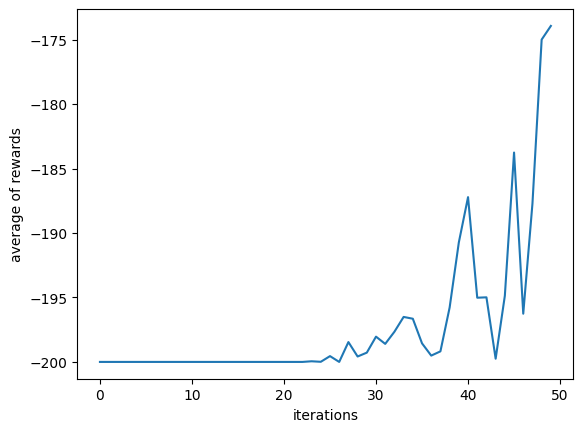

In [7]:
x_axis = np.arange(len(rewards_list))
plt.ylabel('average of rewards')
plt.xlabel('iterations')
plt.plot(x_axis,rewards_list)
plt.show()